In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Activation, Masking, Bidirectional, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras import regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pylab as plt


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

trainD = np.append(trainD, validationD, axis=0)
trainL = np.append(trainL, validationL, axis=0)

oneis = 0
twous = 0

AONtrainD = []
AONtrainL = []
AONtestD = []
AONtestL = []

print(len(trainL))
for i in range(len(trainL)):
    if(trainL[i] != 1):
        if(trainL[i] == 2):
            trainL[i] = 1
        if(trainL[i] == 3):
            trainL[i] = 2
        AONtrainD.append(trainD[i])
        AONtrainL.append(trainL[i])
print("train ok")

for i in range(len(testL)):
    if(testL[i] != 1):
        if(testL[i] == 2):
            testL[i] = 1
        if(testL[i] == 3):
            testL[i] = 2
        AONtestD.append(testD[i])
        AONtestL.append(testL[i]) 
print("test ok")

AONtrainD = np.array(AONtrainD)
AONtrainL = np.array(AONtrainL)
AONtestD = np.array(AONtestD)
AONtestL = np.array(AONtestL)


7110
train ok
test ok


In [3]:
timestep = 30
seq = 300

trainData = trainD.reshape((trainD.shape[0], timestep, seq))
trainLabel = np_utils.to_categorical(trainL, 3)
testData = testD.reshape((testD.shape[0], timestep, seq))
testLabel = np_utils.to_categorical(testL, 3)
print(trainLabel)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [4]:
model = Sequential()
#, activity_regularizer=regularizers.l2(0.0001)
# , dropout_W=0.2, dropout_U=0.2
model.add(LSTM(16, return_sequences=True, dropout_W=0.2, dropout_U=0.2, input_shape = (timestep, seq)))
model.add(LSTM(16, return_sequences=True, dropout_W=0.2, dropout_U=0.2))
model.add(LSTM(16, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))

model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.add(Dense(3, activation='tanh'))

model.add(Dense(3, activation="softmax"))
print(model.summary())
adam = Adam(lr = 0.001)
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
# graph = TensorBoard()
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=200,
                          validation_data=(testData, testLabel),
                          #callbacks=[graph],
                          batch_size=70,
                          #shuffle=False,
                          )


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, return_sequences=True, recurrent_dropout=0.2, dropout=0.2, input_shape=(30, 300))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, return_sequences=True, recurrent_dropout=0.2, dropout=0.2)`
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, recurrent_dropout=0.2, dropout=0.2)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 16)            20288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 16)            2112      
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 12        
__________

7110/7110 [==============================] - 22s 3ms/step - loss: 0.6349 - acc: 0.7426 - val_loss: 0.8321 - val_acc: 0.6527
Epoch 47/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.6327 - acc: 0.7480 - val_loss: 0.8410 - val_acc: 0.6501
Epoch 48/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.6237 - acc: 0.7456 - val_loss: 0.8364 - val_acc: 0.6616
Epoch 49/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.6280 - acc: 0.7478 - val_loss: 0.8496 - val_acc: 0.6564
Epoch 50/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.6236 - acc: 0.7482 - val_loss: 0.8391 - val_acc: 0.6534
Epoch 51/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.6277 - acc: 0.7401 - val_loss: 0.8410 - val_acc: 0.6491
Epoch 52/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.6148 - acc: 0.7522 - val_loss: 0.8379 - val_acc: 0.6508
Epoch 53/200
7110/7110 [==============================

Epoch 106/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.5291 - acc: 0.7956 - val_loss: 0.9038 - val_acc: 0.6435
Epoch 107/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.5274 - acc: 0.7975 - val_loss: 0.9040 - val_acc: 0.6393
Epoch 108/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.5313 - acc: 0.7972 - val_loss: 0.9213 - val_acc: 0.6445
Epoch 109/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.5328 - acc: 0.7944 - val_loss: 0.9000 - val_acc: 0.6435
Epoch 110/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.5225 - acc: 0.7969 - val_loss: 0.9114 - val_acc: 0.6248
Epoch 111/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.5232 - acc: 0.8006 - val_loss: 0.9222 - val_acc: 0.6402
Epoch 112/200
7110/7110 [==============================] - 22s 3ms/step - loss: 0.5252 - acc: 0.8028 - val_loss: 0.9073 - val_acc: 0.6426
Epoch 113/200
7110/7110 [=========

7110/7110 [==============================] - 21s 3ms/step - loss: 0.4829 - acc: 0.8174 - val_loss: 0.9262 - val_acc: 0.6462
Epoch 166/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.4764 - acc: 0.8239 - val_loss: 0.9569 - val_acc: 0.6363
Epoch 167/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.4793 - acc: 0.8224 - val_loss: 0.9471 - val_acc: 0.6386
Epoch 168/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.4787 - acc: 0.8255 - val_loss: 0.9339 - val_acc: 0.6429
Epoch 169/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.4809 - acc: 0.8179 - val_loss: 0.9402 - val_acc: 0.6320
Epoch 170/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.4749 - acc: 0.8210 - val_loss: 0.9498 - val_acc: 0.6435
Epoch 171/200
7110/7110 [==============================] - 21s 3ms/step - loss: 0.4649 - acc: 0.8283 - val_loss: 0.9701 - val_acc: 0.6281
Epoch 172/200
7110/7110 [=======================

In [5]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

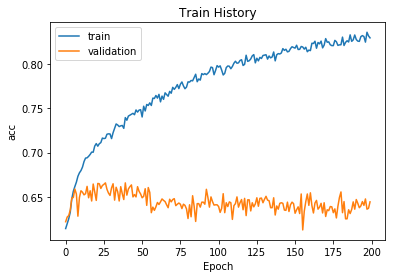

In [6]:
show_plot('acc', train_history)

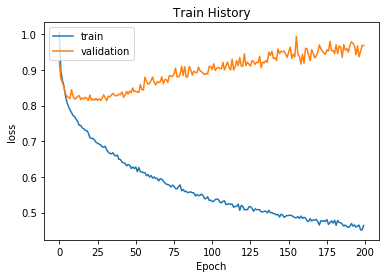

In [7]:
show_plot('loss', train_history)